## Importing Important Libraries

In [308]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import Audio
import seaborn as sns

## Data Loading

In [309]:
dataset_speech='Audio_Speech_Actors_01-24'
dataset_song='Audio_Song_Actors_01-24'

In [355]:
file_folder = os.listdir(dataset_song)
file_folder

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

## Creating Dataframe through data

In [318]:
# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [311]:
# iteration through speech data
emotions = []
gender = []
actor_ID = []
file_path = []
for i in file_folder:
    filename = os.listdir(dataset_speech +'/'+ i) 
    for f in filename: 
        string = f.split('.')[0].split('-')
        emotions.append(int(string[2])) 
        actor_ID.append(int(string[6]))
        b = int(string[6])
        if b%2 == 0:
            b = "female"
        else:
            b = "male"  
        gender.append(b)
        file_path.append(dataset_speech + '/'+i + '/' + f) # storing path
     

In [312]:
len(emotions)

1440

In [313]:
# iteration through song data
for i in file_folder:
    filename = os.listdir(dataset_song +'/'+ i) 
    for f in filename: 
        part = f.split('.')[0].split('-')
        emotions.append(int(part[2]))
        actor_ID.append(int(part[6])) 
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female" 
        else:
            bg = "male"  
        gender.append(bg)
        file_path.append(dataset_song + '/'+i + '/' + f)
     

In [314]:
df = pd.DataFrame(emotions)
df = df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
df = pd.concat([pd.DataFrame(gender),df,pd.DataFrame(actor_ID)],axis=1)
df.columns = ['Gender','Emotion','Actor_ID']
df = pd.concat([df,pd.DataFrame(file_path, columns = ['Path'])],axis=1)
df

,Gender,Emotion,Actor_ID,Path
0,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
1,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
2,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
3,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
4,male,calm,1,Audio_Speech_Actors_01-24/Actor_01/03-01-02-01...
...,...,...,...,...
2447,female,fear,24,Audio_Song_Actors_01-24/Actor_24/03-02-06-01-0...
2448,female,fear,24,Audio_Song_Actors_01-24/Actor_24/03-02-06-02-0...
2449,female,fear,24,Audio_Song_Actors_01-24/Actor_24/03-02-06-02-0...
2450,female,fear,24,Audio_Song_Actors_01-24/Actor_24/03-02-06-02-0...


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    2452 non-null   object
 1   Emotion   2452 non-null   object
 2   Actor_ID  2452 non-null   int64 
 3   Path      2452 non-null   object
dtypes: int64(1), object(3)
memory usage: 76.8+ KB


No Null values

## Emotion

In [316]:
df['Emotion'].value_counts()

Emotion
calm        376
happy       376
sad         376
angry       376
fear        376
disgust     192
surprise    192
neutral     188
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

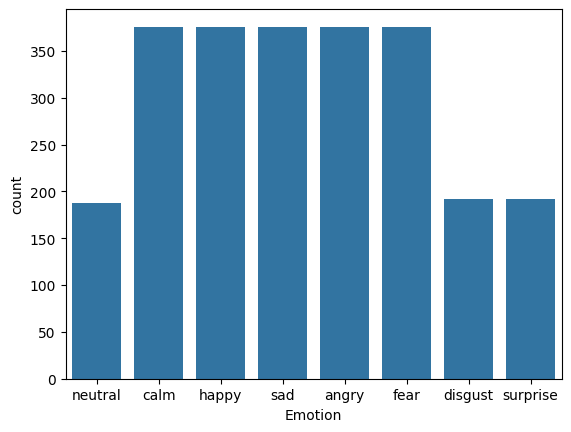

In [317]:
sns.countplot(df,x='Emotion')

In [319]:
df['Path'][2447]
Audio(df['Path'][2447])

## Plots For Different Emotions

In [18]:
# waveplot
def waveplot(path,emotion):
    data,sr=librosa.load(path)
    librosa.display.waveshow(data,sr=sr)
    plt.title('waveplot for {} emotion'.format(emotion))

In [19]:
# spectogram
def spectogram(path,emotion):
    data,sr=librosa.load(path)
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.title('spectrogram for {} emotion'.format(emotion))
    plt.colorbar()

### 1. Neutral

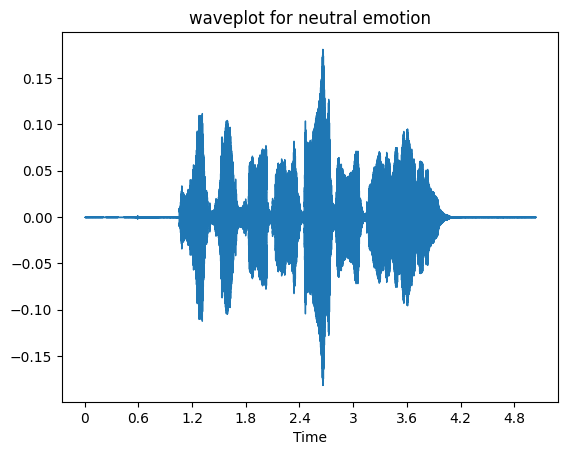

In [20]:
path=df['Path'][df['Emotion']=='neutral'].sample(1).iloc[0]
waveplot(path,'neutral')

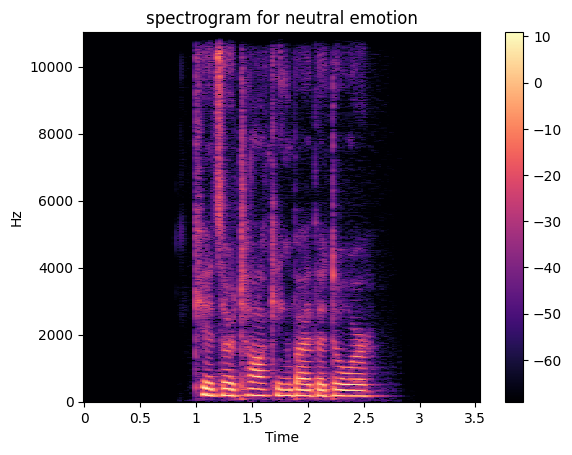

In [14]:
spectogram(path,'neutral')

### 2. Calm

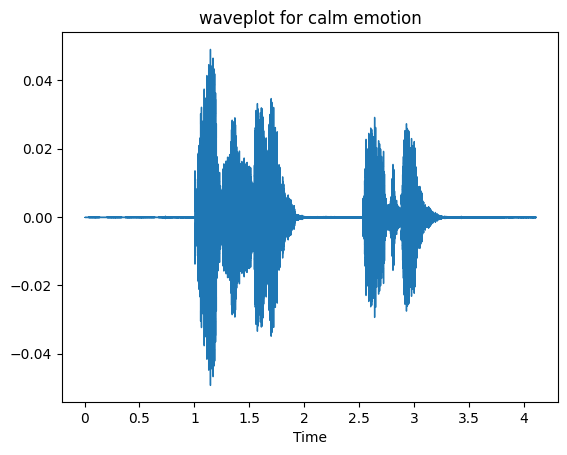

In [15]:
path=df_speech['Path'][df_speech['Emotion']=='calm'].sample(1).iloc[0]
waveplot(path,'calm')

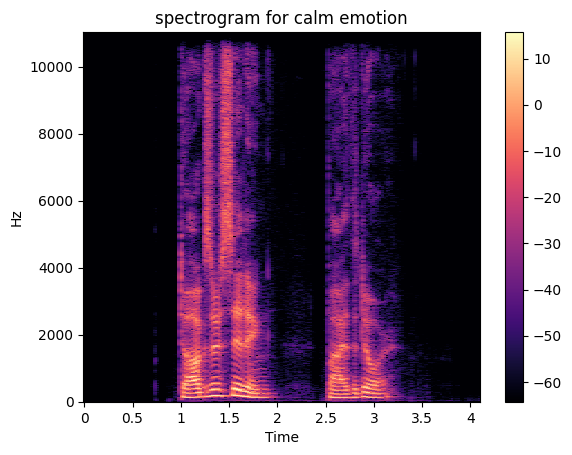

In [16]:
spectogram(path,'calm')

### 3. Happy

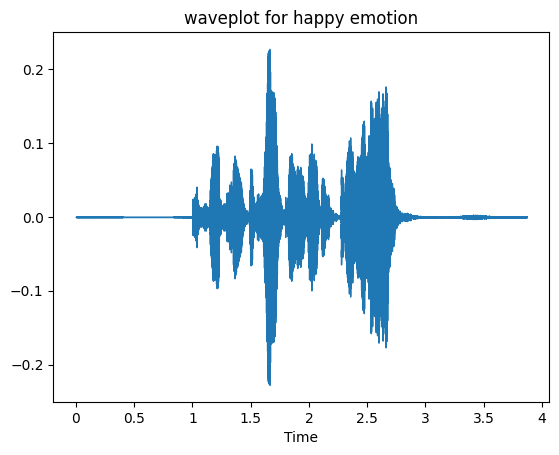

In [17]:
path=df['Path'][df['Emotion']=='happy'].sample(1).iloc[0]
waveplot(path,'happy')

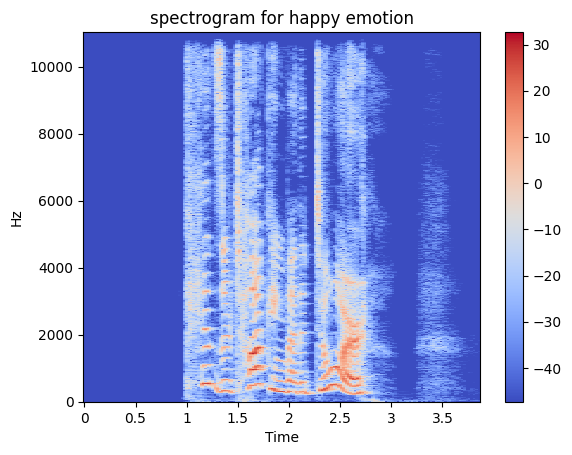

In [18]:
spectogram(path,'happy')

### 4. Sad

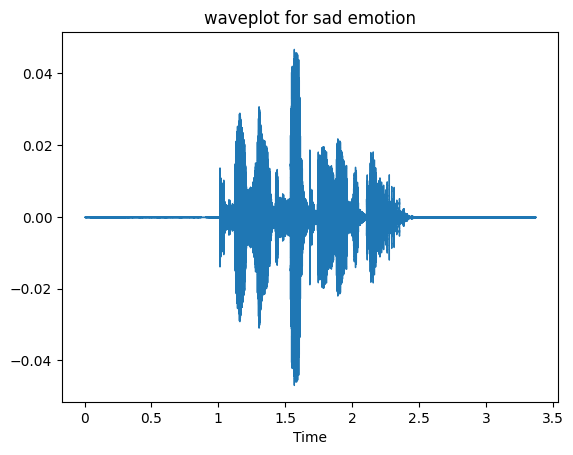

In [121]:
path=df['Path'][df['Emotion']=='sad'].sample(1).iloc[0]
waveplot(path,'sad')

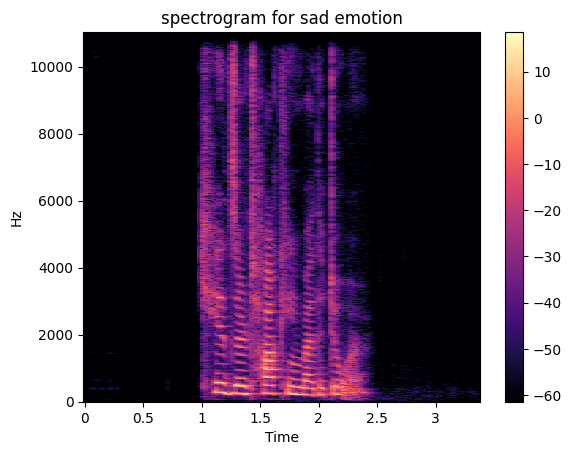

In [122]:
spectogram(path,'sad')

### 5. Angry

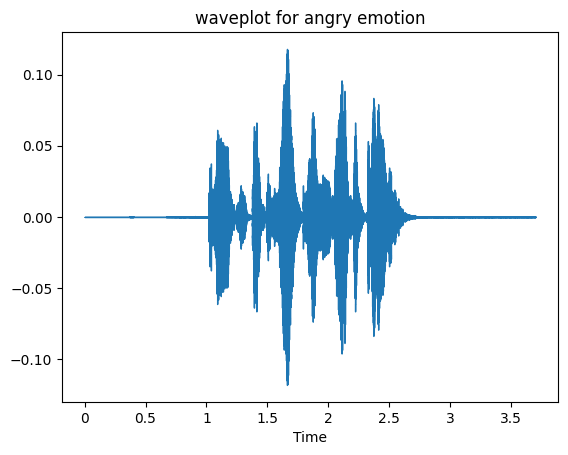

In [123]:
path=df['Path'][df['Emotion']=='angry'].sample(1).iloc[0]
waveplot(path,'angry')

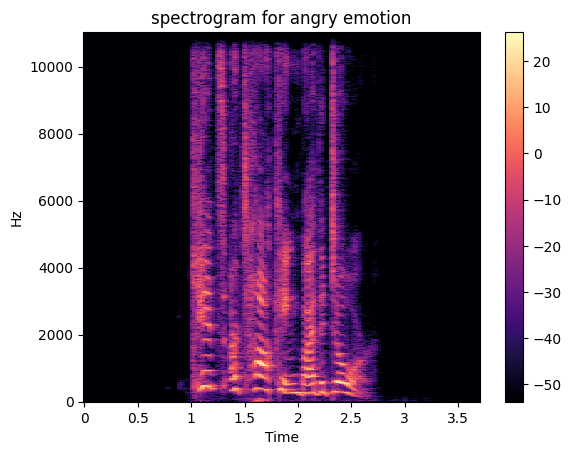

In [124]:
spectogram(path,'angry')

### 6. fear

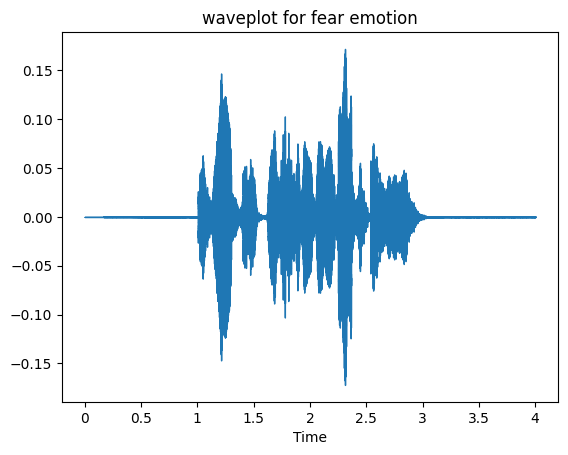

In [134]:
path=df['Path'][df['Emotion']=='fear'].sample(1).iloc[0]
waveplot(path,'fear')

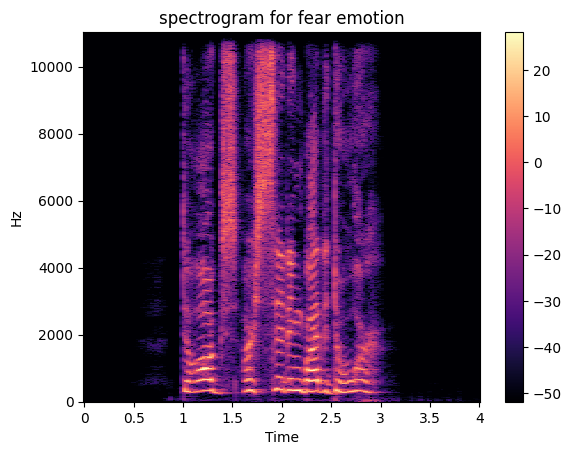

In [135]:
spectogram(path,'fear')

### 7. Disgust

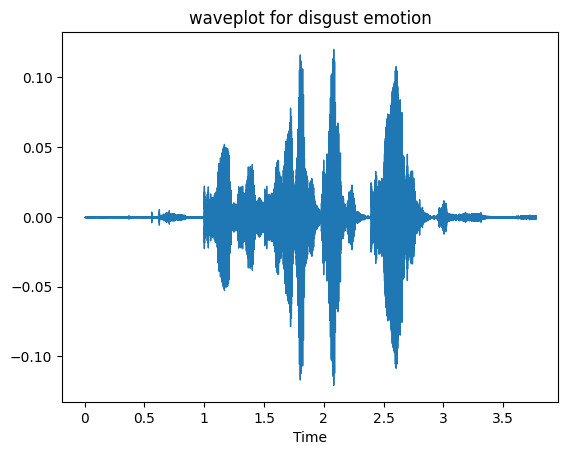

In [128]:
path=df['Path'][df['Emotion']=='disgust'].sample(1).iloc[0]
waveplot(path,'disgust')

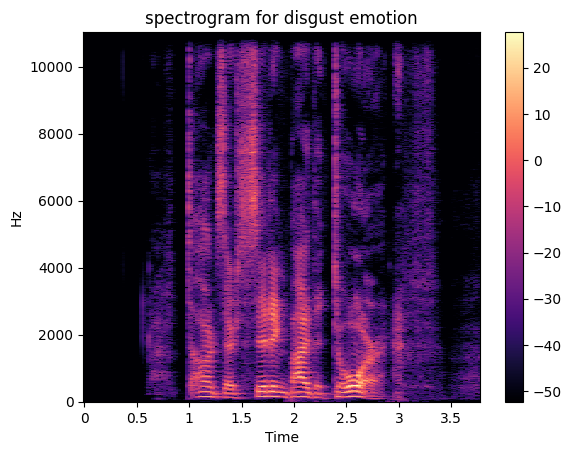

In [129]:
spectogram(path,'disgust')

### 8. Surprise

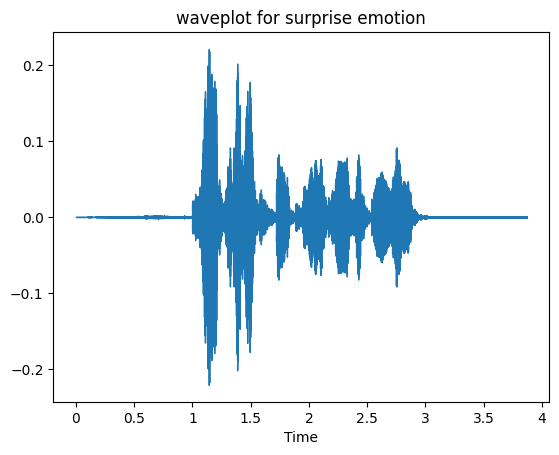

In [136]:
path=df['Path'][df['Emotion']=='surprise'].sample(1).iloc[0]
waveplot(path,'surprise')

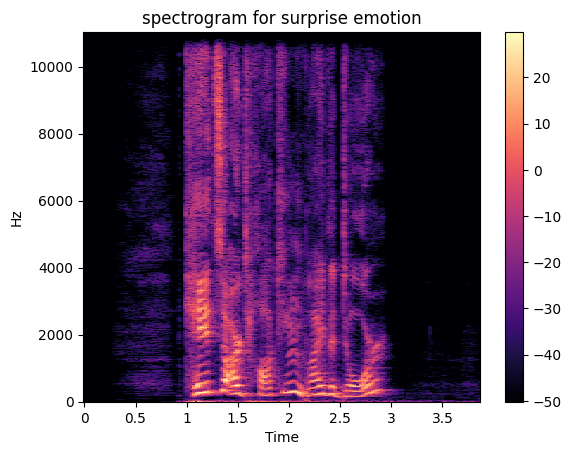

In [137]:
spectogram(path,'surprise')

## Feature extraction

In [320]:
def features_extract(file_path):
    y,sr=librosa.load(file_path)
    result = np.array([])


    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    result=np.hstack((result, zcr)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) 

    # Chroma_stft
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # Spectral Centroid
    speCen = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    result = np.hstack((result, speCen))

    # Spectral Rolloff
    specRollOff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    result = np.hstack((result, specRollOff))
 
    return result.tolist()


In [321]:
n=len(features_extract(df_speech['Path'][0]))
n

183

In [322]:
def to_df(df,df_features):
    for j in range(df.shape[0]):
        row=features_extract(df['Path'][j])
        df_features.loc[len(df_features)] = row
        

In [323]:
columns=[]
for i in range(n):
    columns.append('F{}'.format(i+1))
df_features=pd.DataFrame(columns=columns)

to_df(df,df_features)

In [324]:
df_features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F174,F175,F176,F177,F178,F179,F180,F181,F182,F183
0,0.372712,-697.792603,54.890041,0.663466,12.435786,7.733951,0.530750,-3.216631,-3.159394,-10.977551,...,0.000002,0.000002,0.000002,0.000004,0.000006,0.000005,0.000004,3.206722e-07,3470.937689,6330.385264
1,0.380551,-692.855774,55.363895,-1.548319,16.038307,8.818810,-0.146586,-1.373392,-5.293180,-11.623182,...,0.000005,0.000005,0.000005,0.000009,0.000007,0.000008,0.000004,3.190813e-07,3264.835349,6237.152100
2,0.399123,-691.587891,58.024662,0.159465,13.624650,5.374113,1.162336,-2.083359,-5.382585,-10.332824,...,0.000010,0.000012,0.000015,0.000021,0.000037,0.000024,0.000013,1.119756e-06,3233.896121,6180.487450
3,0.396930,-685.105469,55.879421,2.783262,13.252023,6.989669,2.981274,-1.586029,-6.961661,-10.348489,...,0.000015,0.000020,0.000063,0.000032,0.000029,0.000031,0.000018,1.238117e-06,3114.655307,6165.490455
4,0.356985,-727.104370,62.355034,3.121181,15.064671,8.132434,1.927084,-3.274656,-3.761792,-9.750298,...,0.000003,0.000008,0.000004,0.000003,0.000003,0.000004,0.000002,1.941219e-07,3226.498012,6070.041073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0.270414,-550.250305,34.496513,-2.150460,-4.785324,-14.129478,-10.087738,-8.801634,-11.244440,-13.818263,...,0.001058,0.000992,0.001091,0.000835,0.000493,0.000620,0.000379,3.102930e-05,2925.214591,5468.777760
2448,0.211256,-475.102692,29.051455,-16.547192,-2.158430,-17.214296,-12.165742,-10.309013,-13.249679,-9.555246,...,0.001091,0.000790,0.001207,0.001371,0.000826,0.000742,0.000419,3.186222e-05,3079.150485,5759.747314
2449,0.223822,-477.134369,30.041761,-12.191296,-1.255466,-14.053341,-10.955487,-8.406560,-10.288776,-8.479887,...,0.001188,0.001084,0.000773,0.000717,0.000910,0.000997,0.000664,4.833078e-05,3076.313966,5847.132923
2450,0.232358,-462.474670,28.210682,-7.629289,-0.566429,-15.072533,-7.318338,-8.435737,-9.711742,-8.321024,...,0.003337,0.003547,0.003172,0.002385,0.002879,0.003814,0.002770,1.968900e-04,3109.707717,5852.736376


In [325]:
df.head()

,Gender,Emotion,Actor_ID,Path
0,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
1,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
2,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
3,male,neutral,1,Audio_Speech_Actors_01-24/Actor_01/03-01-01-01...
4,male,calm,1,Audio_Speech_Actors_01-24/Actor_01/03-01-02-01...


In [326]:
df_features.insert(0,'Gender',df['Gender'])
df_features.insert(1,'Emotion',df['Emotion'])

In [327]:
# suffling data for no bias
df_features =df_features.sample(frac=1, random_state=42).reset_index(drop=True)


In [328]:
df_features

,Gender,Emotion,F1,F2,F3,F4,F5,F6,F7,F8,...,F174,F175,F176,F177,F178,F179,F180,F181,F182,F183
0,female,happy,0.287493,-569.573120,36.597816,-12.074026,4.955482,-5.378244,-17.354467,-14.647882,...,0.002034,0.001767,0.002313,0.001775,0.000805,0.000593,0.000416,4.033043e-05,2883.463279,5030.786490
1,female,fear,0.168654,-434.162750,33.842628,-20.775936,-2.662330,-2.221054,-10.298862,-5.413197,...,0.001286,0.001032,0.000621,0.000617,0.000703,0.000841,0.000572,8.592499e-05,2611.630171,5228.823454
2,female,sad,0.315635,-484.497467,25.881422,-31.882252,-4.438725,-10.472032,-24.525002,-11.578903,...,0.000187,0.000181,0.000175,0.000166,0.000179,0.000192,0.000111,1.156619e-05,3269.842467,6100.544714
3,female,calm,0.263703,-583.923218,35.698681,-17.654512,-8.304430,-22.771912,-18.339802,-8.246468,...,0.000038,0.000030,0.000029,0.000025,0.000024,0.000030,0.000019,1.194641e-06,2614.477681,4776.983327
4,male,calm,0.128866,-618.753784,84.348305,-2.472456,15.881188,-8.007402,-17.297785,-3.673886,...,0.000010,0.000009,0.000007,0.000006,0.000004,0.000003,0.000001,9.243512e-08,1914.198656,3682.135010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,male,sad,0.156544,-622.494141,78.722725,4.075021,19.705750,5.022979,-16.308474,-7.225638,...,0.000024,0.000019,0.000015,0.000010,0.000009,0.000012,0.000007,5.557762e-07,2151.588647,4348.281317
2448,male,happy,0.134940,-654.079407,69.526199,3.182496,18.595871,0.672503,14.328771,0.106472,...,0.000008,0.000008,0.000010,0.000011,0.000013,0.000015,0.000010,7.381857e-07,2191.396431,4673.382696
2449,male,disgust,0.250675,-432.046204,6.456399,-3.996644,2.396689,-23.257391,-0.108925,-10.391572,...,0.003678,0.003705,0.004473,0.003374,0.002519,0.002982,0.001855,1.347675e-04,3599.843502,6784.127059
2450,female,angry,0.307105,-433.710541,23.460344,-14.926404,-2.214860,-6.271779,-12.586202,-8.922878,...,0.003413,0.004500,0.003277,0.003531,0.004493,0.005581,0.002313,1.715799e-04,3221.907929,5844.440798


In [329]:
df_features['Gender'] = np.where(df_features['Gender']=='male',1,0)

In [330]:
df_features.head()

,Gender,Emotion,F1,F2,F3,F4,F5,F6,F7,F8,...,F174,F175,F176,F177,F178,F179,F180,F181,F182,F183
0,0,happy,0.287493,-569.573120,36.597816,-12.074026,4.955482,-5.378244,-17.354467,-14.647882,...,0.002034,0.001767,0.002313,0.001775,0.000805,0.000593,0.000416,4.033043e-05,2883.463279,5030.786490
1,0,fear,0.168654,-434.162750,33.842628,-20.775936,-2.662330,-2.221054,-10.298862,-5.413197,...,0.001286,0.001032,0.000621,0.000617,0.000703,0.000841,0.000572,8.592499e-05,2611.630171,5228.823454
2,0,sad,0.315635,-484.497467,25.881422,-31.882252,-4.438725,-10.472032,-24.525002,-11.578903,...,0.000187,0.000181,0.000175,0.000166,0.000179,0.000192,0.000111,1.156619e-05,3269.842467,6100.544714
3,0,calm,0.263703,-583.923218,35.698681,-17.654512,-8.304430,-22.771912,-18.339802,-8.246468,...,0.000038,0.000030,0.000029,0.000025,0.000024,0.000030,0.000019,1.194641e-06,2614.477681,4776.983327
4,1,calm,0.128866,-618.753784,84.348305,-2.472456,15.881188,-8.007402,-17.297785,-3.673886,...,0.000010,0.000009,0.000007,0.000006,0.000004,0.000003,0.000001,9.243512e-08,1914.198656,3682.135010


In [331]:

order={'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'surprise':7}
df_features['Emotion']=df_features['Emotion'].map(order)

In [332]:
df_features['Emotion'].value_counts()

Emotion
2    376
5    376
3    376
1    376
4    376
7    192
6    192
0    188
Name: count, dtype: int64

In [333]:
y=df_features['Emotion']
X=df_features.drop(columns=['Emotion'])

## Splitting data into test train 80/20

In [334]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [335]:
X_train.shape[1]

184

## Standard Scaling

In [336]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [337]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

In [294]:
from sklearn.metrics import classification_report,confusion_matrix

# Model training

## 1. Random Forest algorithm

In [296]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=None)

In [297]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [298]:
y_pred_rf=rf.predict(X_test_scaled)

In [299]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.48      0.59        31
           1       0.63      0.88      0.74        65
           2       0.58      0.66      0.62        82
           3       0.64      0.51      0.56        83
           4       0.78      0.81      0.80        84
           5       0.57      0.54      0.55        69
           6       0.68      0.54      0.60        39
           7       0.64      0.66      0.65        38

    accuracy                           0.65       491
   macro avg       0.66      0.63      0.64       491
weighted avg       0.65      0.65      0.64       491



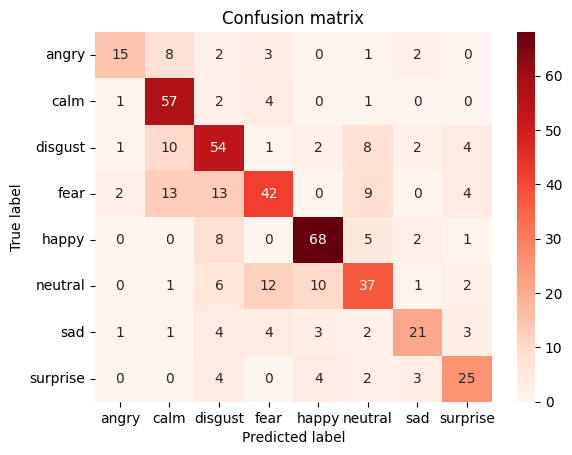

In [300]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

## 2. XGBoost Classifier

In [224]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [225]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [226]:
y_pred_xgb=xgb.predict(X_test_scaled)

In [227]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        37
           1       0.83      0.89      0.86        80
           2       0.72      0.65      0.68        71
           3       0.70      0.71      0.70        78
           4       0.82      0.83      0.82        81
           5       0.68      0.60      0.63        77
           6       0.61      0.61      0.61        33
           7       0.60      0.76      0.68        34

    accuracy                           0.73       491
   macro avg       0.72      0.72      0.72       491
weighted avg       0.73      0.73      0.73       491



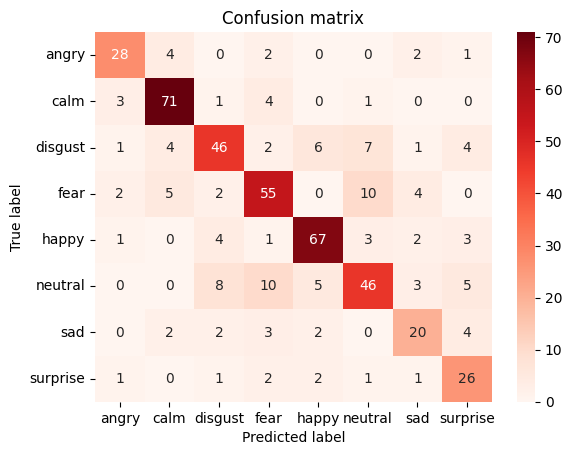

In [211]:
cm=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

## 3. MLP model

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [372]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dropout(0.1))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.1))

model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(8, activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\mahip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [373]:
model1.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │          23,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,680 (135.47 KB)

 Trainable params: 34,680 (135.47 KB)

 Non-trainable params: 0 (0.00 B)

In [374]:
history1=model1.fit(X_train_scaled,y_train,batch_size=32,epochs = 300,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1668 - loss: 2.0466 - val_accuracy: 0.3666 - val_loss: 1.7645
Epoch 2/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3058 - loss: 1.7861 - val_accuracy: 0.4033 - val_loss: 1.5783
Epoch 3/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3732 - loss: 1.6371 - val_accuracy: 0.4908 - val_loss: 1.4120
Epoch 4/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4495 - loss: 1.4708 - val_accuracy: 0.5479 - val_loss: 1.2696
Epoch 5/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5110 - loss: 1.3172 - val_accuracy: 0.5703 - val_loss: 1.1864
Epoch 6/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5308 - loss: 1.2321 - val_accuracy: 0.5866 - val_loss: 1.1346
Epoch 7/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5560 - loss: 1.1760 - val_accuracy: 0.6029 - val_loss: 1.0790
Epoch 8/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5750 - loss: 1.1098 - val_accuracy: 0.6090 - 

In [399]:
def plot(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

In [ ]:
plot(history1)

In [375]:
y_pred_m1=model1.predict(X_test_scaled)
y_pred_m1=np.argmax(y_pred_m1,axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


In [376]:
print(classification_report(y_test,y_pred_m1))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        33
           1       0.90      0.82      0.86        89
           2       0.77      0.72      0.75        69
           3       0.64      0.77      0.70        65
           4       0.91      0.81      0.86        88
           5       0.71      0.84      0.77        69
           6       0.69      0.57      0.62        42
           7       0.64      0.64      0.64        36

    accuracy                           0.76       491
   macro avg       0.74      0.74      0.74       491
weighted avg       0.77      0.76      0.76       491



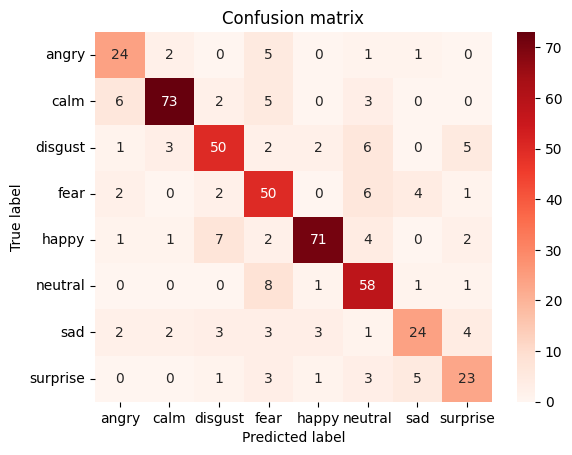

In [377]:
cm=confusion_matrix(y_test,y_pred_m1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

## 4. CNN model

In [378]:
from keras.layers import Dense, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D,LSTM,BatchNormalization
from tensorflow.keras import regularizers

In [413]:
model2 = Sequential()

model2.add(Conv1D(256, 5,padding='same',input_shape=(X_train_scaled.shape[1],1)))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(MaxPooling1D(pool_size=(8)))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(Flatten())
model2.add(Dense(8))
model2.add(Activation('softmax'))

C:\Users\mahip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [414]:
model2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)                   │ (None, 184, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 184, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 184, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 23, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │          23,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,064 (738.53 KB)

 Trainable params: 189,064 (738.53 KB)

 Non-trainable params: 0 (0.00 B)

In [415]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [420]:
history2=model2.fit(X_train_scaled,y_train,batch_size=32,epochs = 100,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9616 - loss: 0.1132 - val_accuracy: 0.7393 - val_loss: 1.4682
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9701 - loss: 0.0920 - val_accuracy: 0.7088 - val_loss: 1.5599
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9703 - loss: 0.0940 - val_accuracy: 0.7393 - val_loss: 1.4441
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9805 - loss: 0.0562 - val_accuracy: 0.6904 - val_loss: 2.3547
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9592 - loss: 0.1591 - val_accuracy: 0.7108 - val_loss: 1.7530
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9709 - loss: 0.0934 - val_accuracy: 0.7230 - val_loss: 1.5411
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9836 - loss: 0.0455 - val_accuracy: 0.7312 - val_loss: 1.4554
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9945 - loss: 0.0339 - val_accuracy: 0.

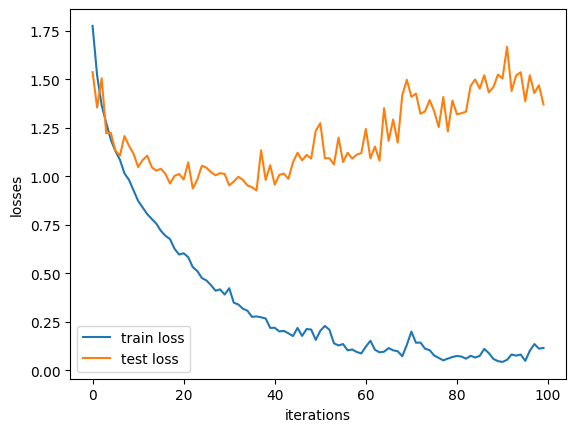

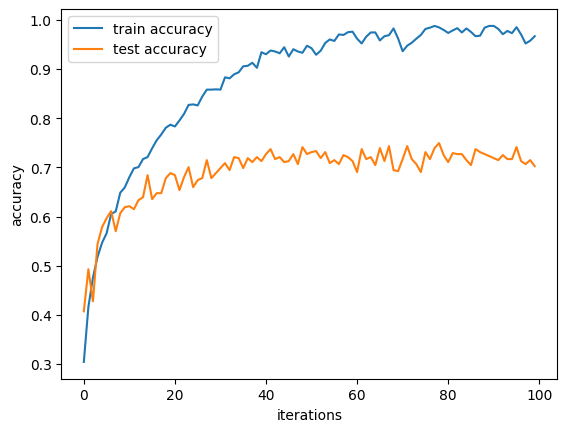

In [417]:
plot(history2)

In [421]:
y_pred_m2=model2.predict(X_test_scaled)
y_pred_m2=np.argmax(y_pred_m2,axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [422]:
print(classification_report(y_test,y_pred_m2))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.85      0.88      0.86        89
           2       0.64      0.75      0.69        69
           3       0.60      0.71      0.65        65
           4       0.85      0.77      0.81        88
           5       0.70      0.62      0.66        69
           6       0.69      0.64      0.67        42
           7       0.75      0.75      0.75        36

    accuracy                           0.74       491
   macro avg       0.75      0.72      0.73       491
weighted avg       0.75      0.74      0.74       491



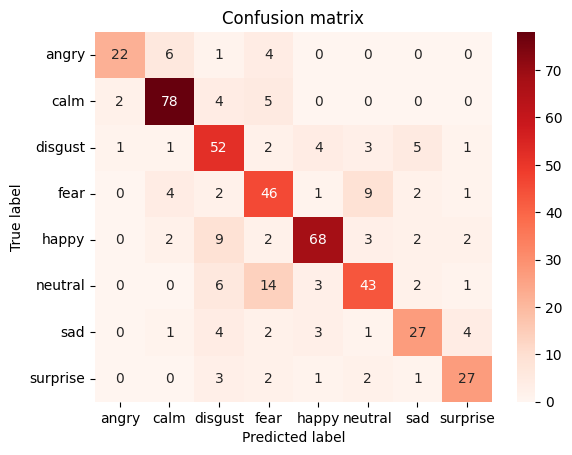

In [423]:
cm=confusion_matrix(y_test,y_pred_m2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

## 5. LSTM model

In [391]:
model3 = Sequential()
model3.add(BatchNormalization(axis=-1, input_shape=(X_train_scaled.shape[1], 1)))
model3.add(LSTM(128, return_sequences=True))
model3.add(LSTM(64, return_sequences=True,))
model3.add(LSTM(32, return_sequences=True,))
model3.add(BatchNormalization())
model3.add(Flatten())

model3.add(Dense(8))
model3.add(Activation('softmax'))

C:\Users\mahip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [392]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [393]:
history3=model3.fit(X_train_scaled,y_train,batch_size=256,epochs = 80,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2061 - loss: 2.0147 - val_accuracy: 0.2342 - val_loss: 2.0029
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3659 - loss: 1.6431 - val_accuracy: 0.2648 - val_loss: 1.9871
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4020 - loss: 1.5436 - val_accuracy: 0.2912 - val_loss: 1.9901
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4233 - loss: 1.4994 - val_accuracy: 0.2831 - val_loss: 1.9837
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4404 - loss: 1.4536 - val_accuracy: 0.2912 - val_loss: 1.9617
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4682 - loss: 1.4112 - val_accuracy: 0.2994 - val_loss: 1.9580
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4870 - loss: 1.3582 - val_accuracy: 0.2790 - val_loss: 1.9453
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4896 - loss: 1.3449 - val_accuracy: 0.2994 - val_loss: 1.9377
Epoch 9/

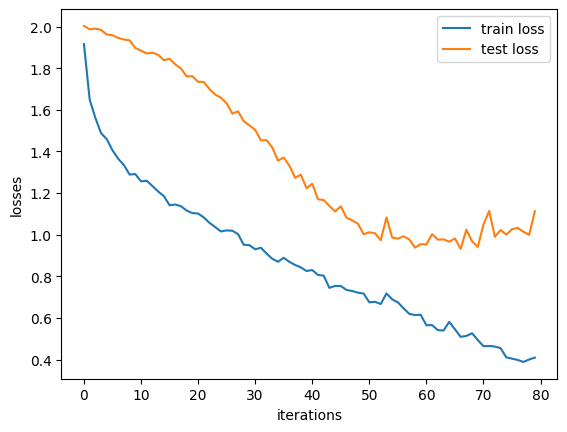

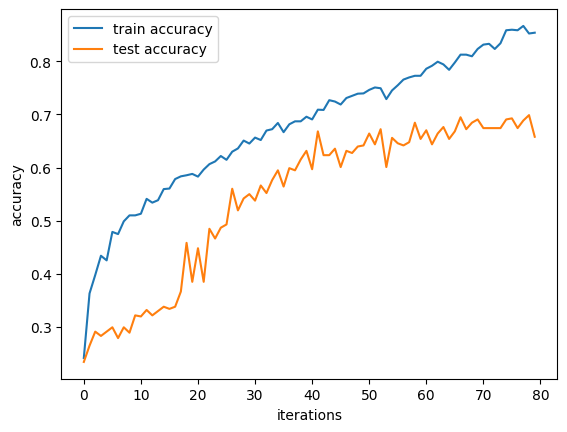

In [400]:
plot(history3)

In [401]:
y_pred_m3=model3.predict(X_test_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step


In [402]:
y_pred_m3=np.argmax(y_pred_m3,axis=1)

In [403]:
print(classification_report(y_test,y_pred_m3))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        33
           1       0.78      0.78      0.78        89
           2       0.58      0.70      0.63        69
           3       0.58      0.63      0.60        65
           4       0.86      0.73      0.79        88
           5       0.61      0.51      0.56        69
           6       0.66      0.45      0.54        42
           7       0.46      0.61      0.52        36

    accuracy                           0.66       491
   macro avg       0.64      0.64      0.64       491
weighted avg       0.67      0.66      0.66       491



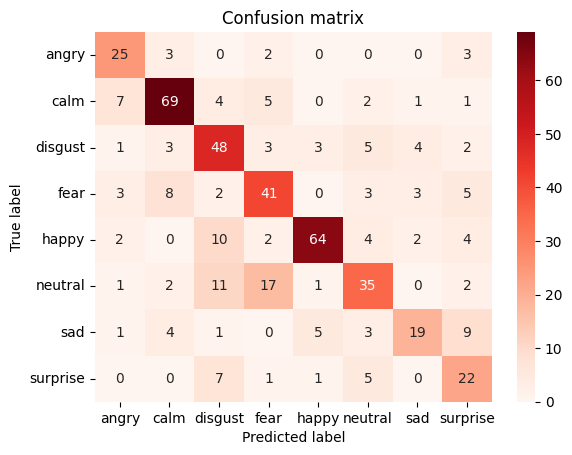

In [404]:
cm=confusion_matrix(y_test,y_pred_m3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()